In [ ]:
Group Members :
    Onkar Kunte
    Shashidhar 
    Reiyo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the data from the Github repository:

In [2]:
url = 'M10_Data.csv'
df = pd.read_csv(url)
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df.shape

(204, 26)

In [4]:
df.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9', '111', '5000', '21', '27', '13495'],
      dtype='object')

Assign meaningful column headings to the content of the dataframe based on the information provided at the UCI web link:

In [5]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Check the structure of the dataframe:

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [9]:
df.describe([0.25,0.50,0.75,0.90,0.99])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
90%,3.000000,107.900000,188.800000,68.680000,56.640000,3230.000000,181.000000,11.080000,31.700000,38.000000
99%,3.000000,115.558000,202.510000,71.700000,59.100000,3948.500000,302.620000,23.000000,44.790000,49.910000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Check for missing values:

In [10]:
print(df.isnull().sum())


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Check the frequency distribution of all the columns :

In [11]:
#Check the frequency distribution of categorical variables:
for col in df.columns:
    print(df[col].value_counts())
    print('-'*117)

 0    67
 1    54
 2    32
 3    26
-1    22
-2     3
Name: symboling, dtype: int64
---------------------------------------------------------------------------------------------------------------------
?      40
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
---------------------------------------------------------------------------------------------------------------------
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
su

Visualize the distribution of numerical variables:

In [12]:
#Replacing the ? values with nan 
for col in df.columns:
    df[col] = df[col].replace('?', np.nan)

In [13]:
#Looking at the null values 
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [14]:
#Now we can see some null value that needs to be treated .

In [15]:
#Looking at the datatype of each variable
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### EDA

In [16]:
#Function to plot for numeric columns 
def plot_numeric_column(df, col_name):
    """
    Plot a subplot of the distribution of a numeric column and box plot of the same.
    
    Args:
        df: Pandas DataFrame object.
        col_name: str, name of the numeric column.
    """
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

    # Distribution plot
    sns.histplot(data=df, x=col_name, kde=True, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(data=df, x=col_name, ax=ax2)
    ax2.set_xlabel(col_name)

    plt.show()

In [17]:
# Function to plot for categoric columns
def plot_categorical_column(df, col_name):
    """
    Plot necessary graphs of EDA for a categorical column.
    
    Args:
        df: Pandas DataFrame object.
        col_name: str, name of the categorical column.
    """

    # Count plot
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(data=df, y=col_name, ax=ax)
    ax.set_xlabel('Count')
    ax.set_ylabel(col_name)
    plt.show()


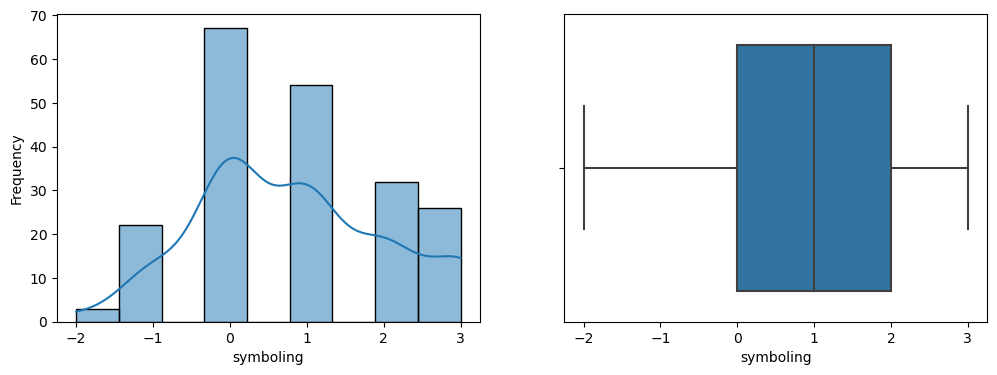

In [18]:
#Looking at symboling
plot_numeric_column(df,'symboling')

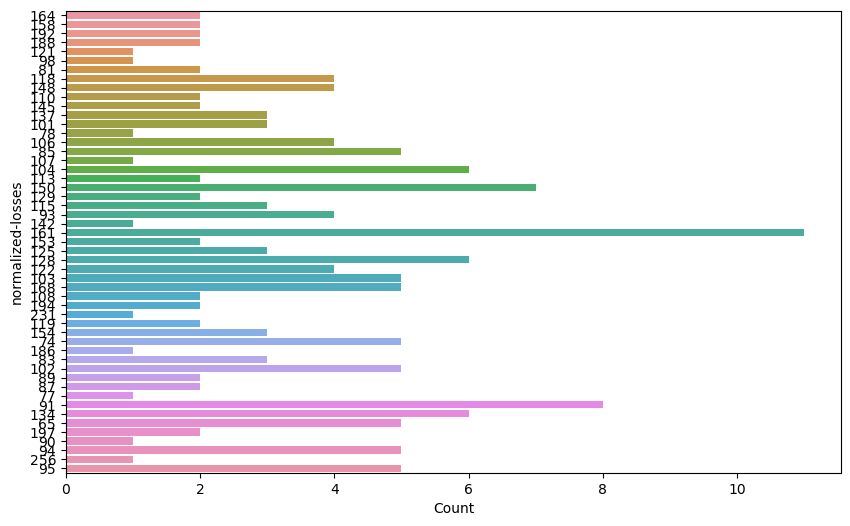

In [19]:
#Looking at normalized-losses
plot_categorical_column(df,'normalized-losses')

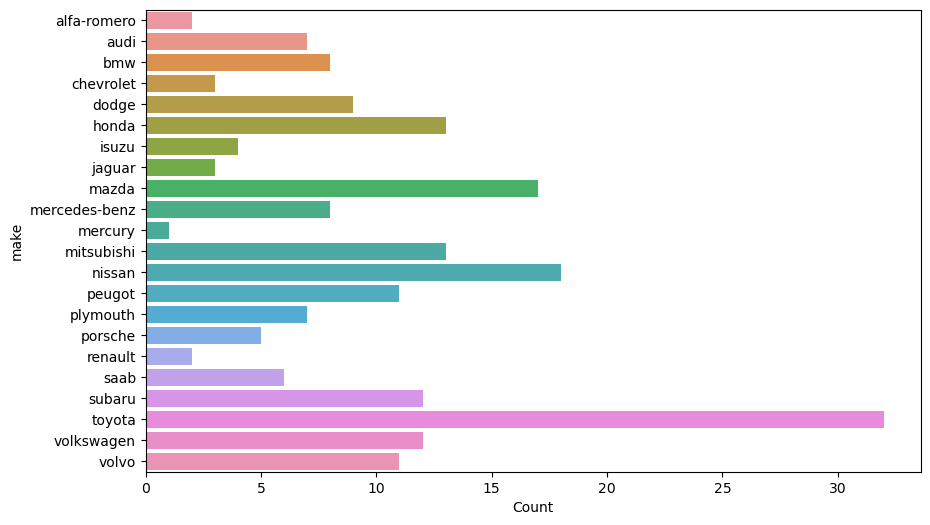

In [20]:
# Looking at make 
plot_categorical_column(df,'make')


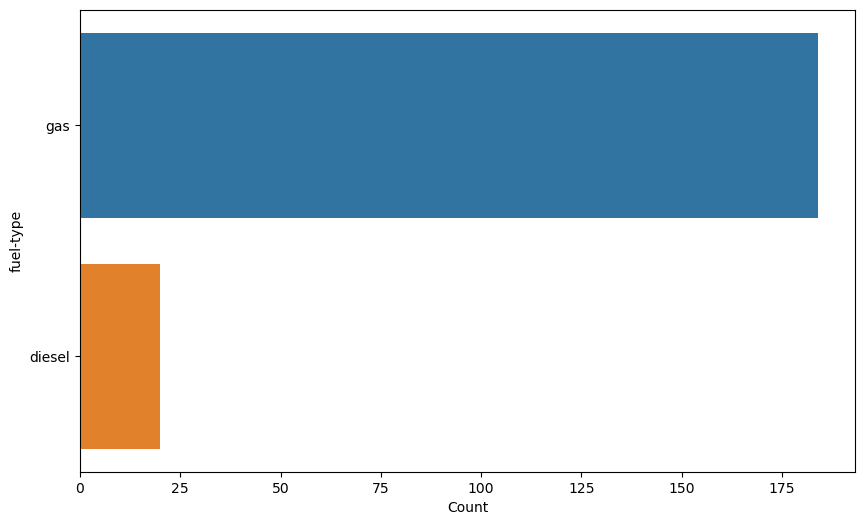

In [21]:
#Looking at the fuel-type
plot_categorical_column(df,'fuel-type')

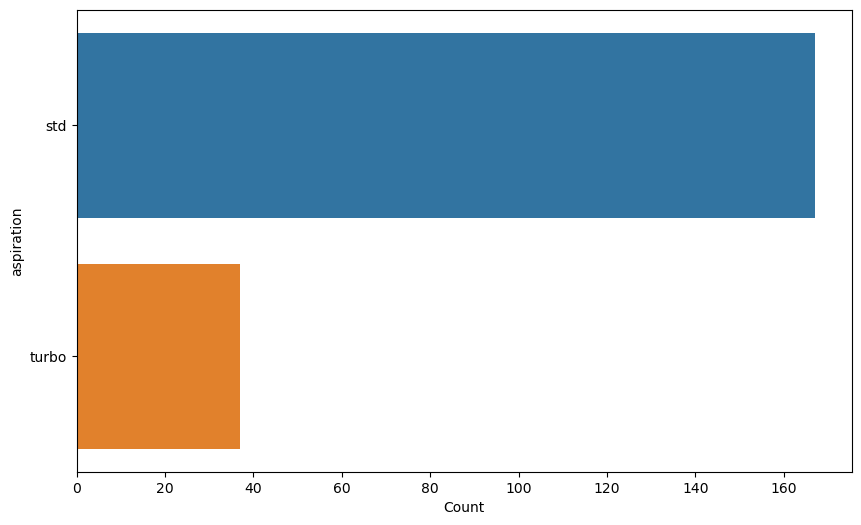

In [22]:
#Looking at aspiration
plot_categorical_column(df,'aspiration')

In [23]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [24]:
#Looking at num-of-doors
df['num-of-doors']=df['num-of-doors'].astype('object')

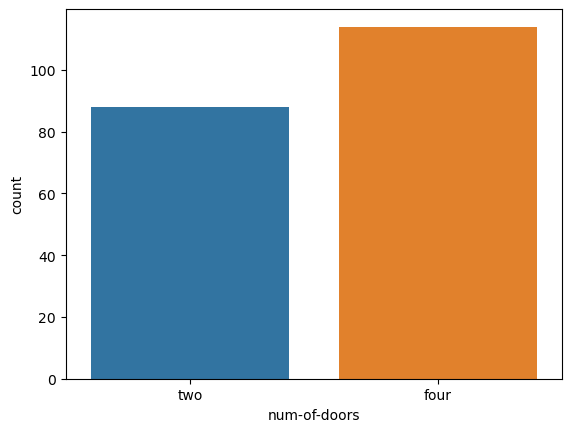

In [25]:
#Looking at num-of-doors
sns.countplot(x='num-of-doors',data=df)
plt.show()

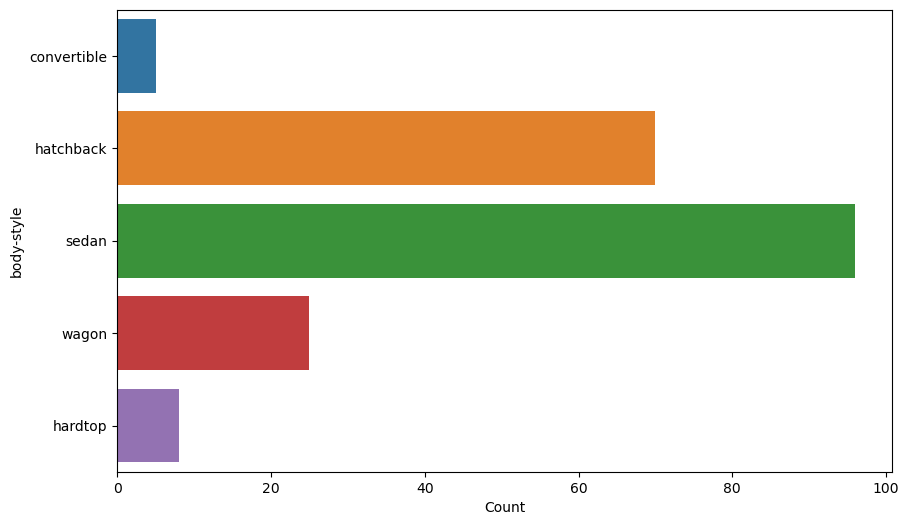

In [26]:
#Looking at body-style
plot_categorical_column(df,'body-style')

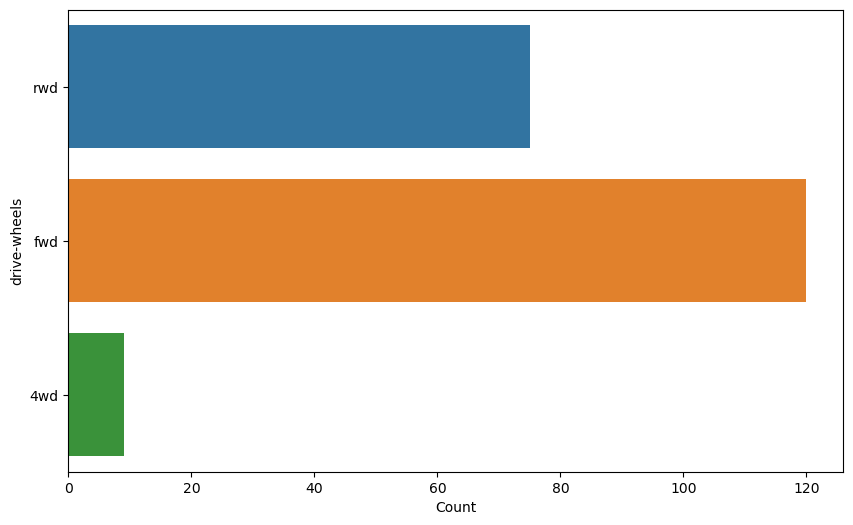

In [27]:
#Looking at drive-wheels
plot_categorical_column(df,'drive-wheels')

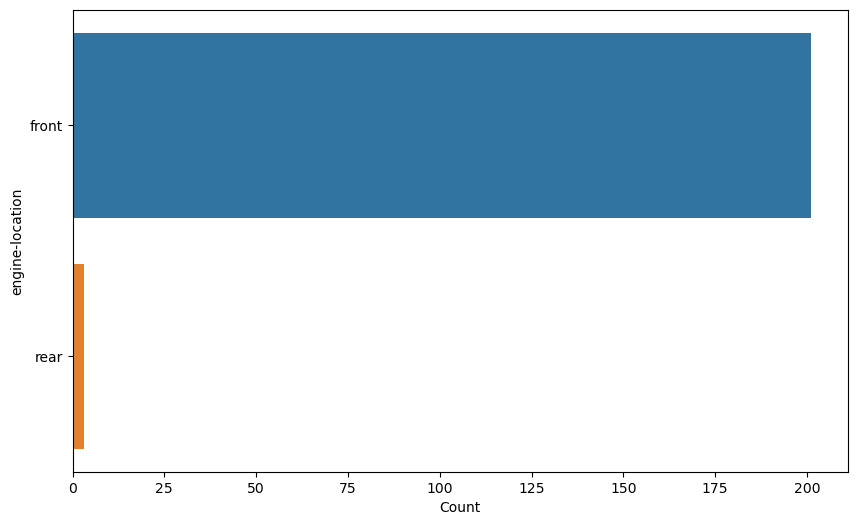

In [28]:
#Looking at engine-location
plot_categorical_column(df,'engine-location')

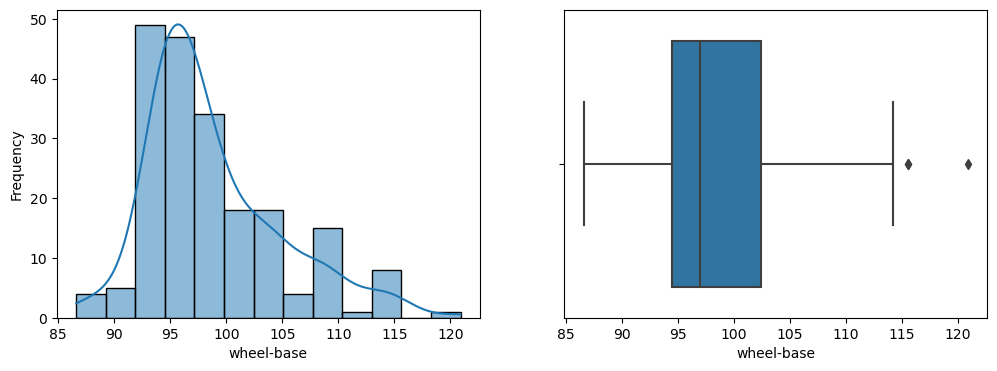

In [29]:
#Looking at wheel-base
plot_numeric_column(df,'wheel-base')

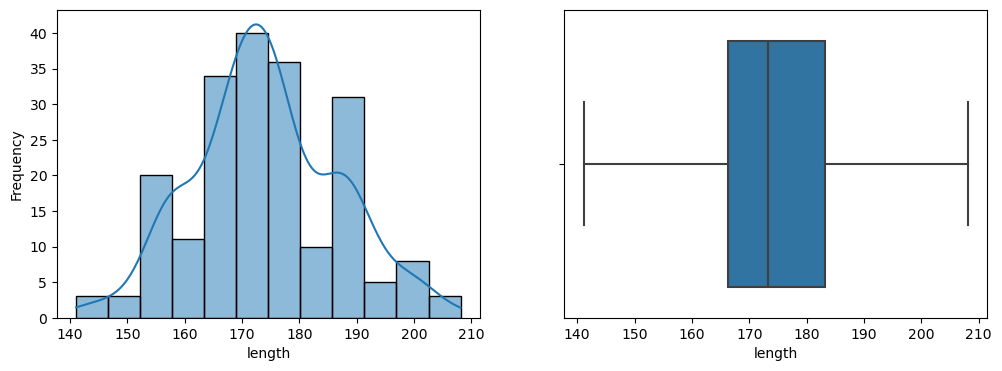

In [30]:
#Looking at length
plot_numeric_column(df,'length')

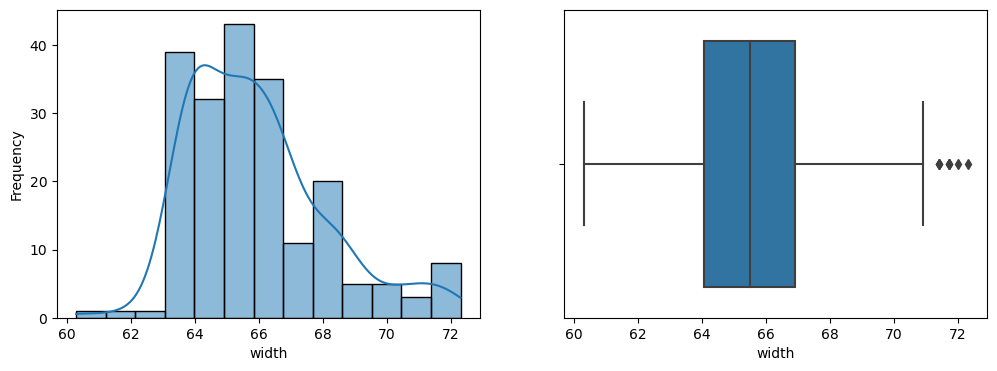

In [31]:
#Looking at width
plot_numeric_column(df,'width')

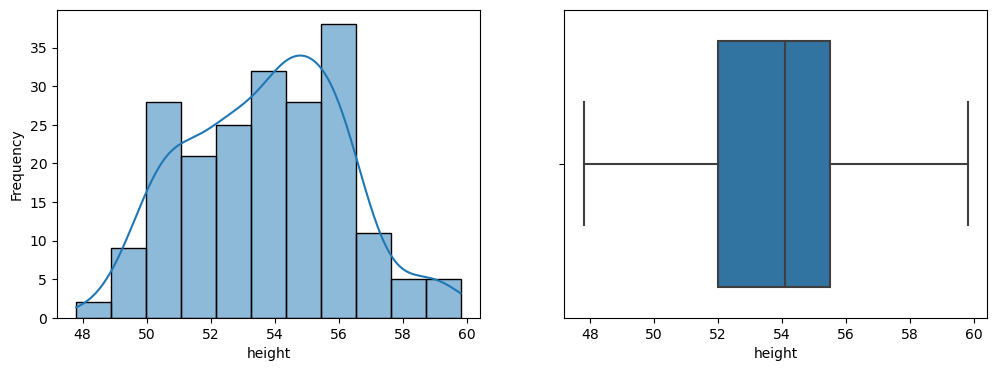

In [32]:
#Looking at height
plot_numeric_column(df,'height')

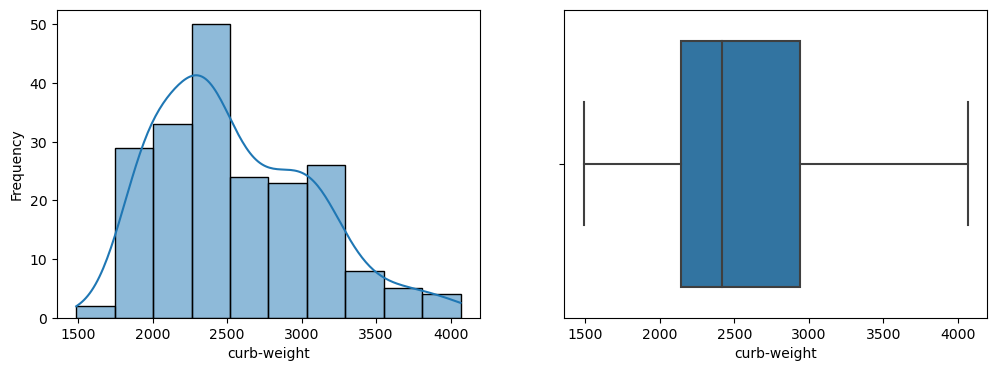

In [33]:
#Looking at curb-weight
plot_numeric_column(df,'curb-weight')

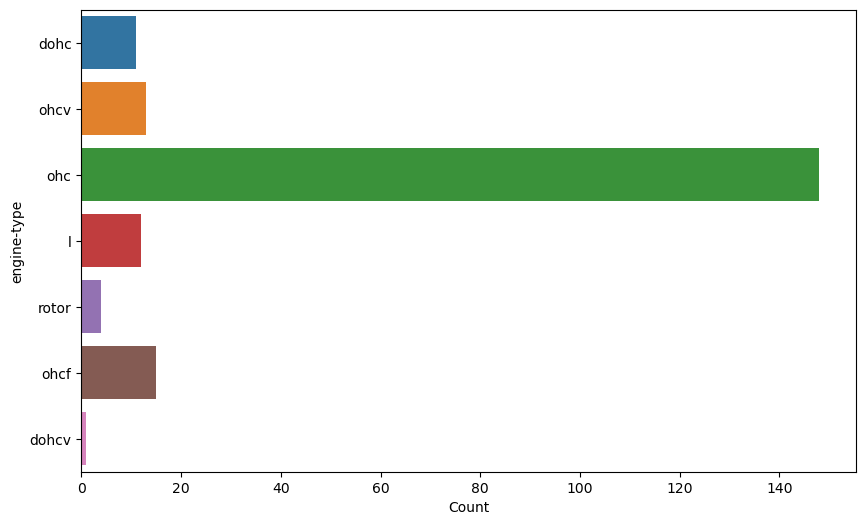

In [34]:
#Looking at engine-type
plot_categorical_column(df,'engine-type')

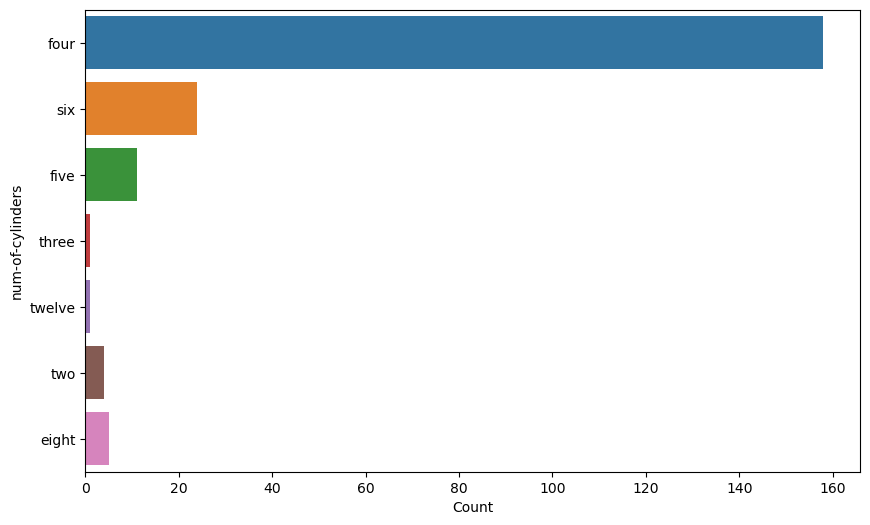

In [35]:
#Looking at num-of-cylinders
plot_categorical_column(df,'num-of-cylinders')

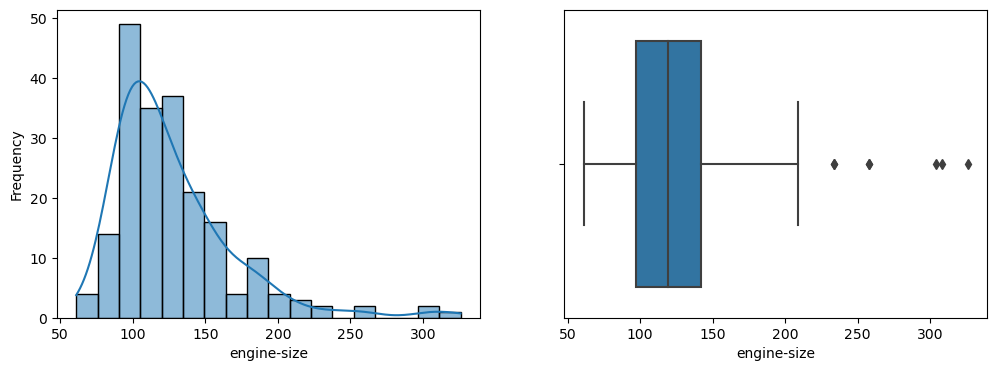

In [36]:
#Looking at engine-size
plot_numeric_column(df,'engine-size')

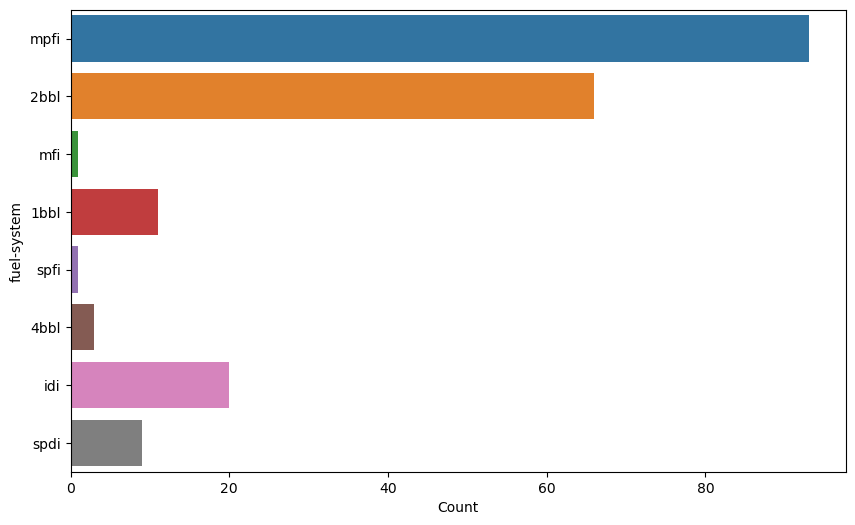

In [37]:
#Looking at fuel-system
plot_categorical_column(df,'fuel-system')

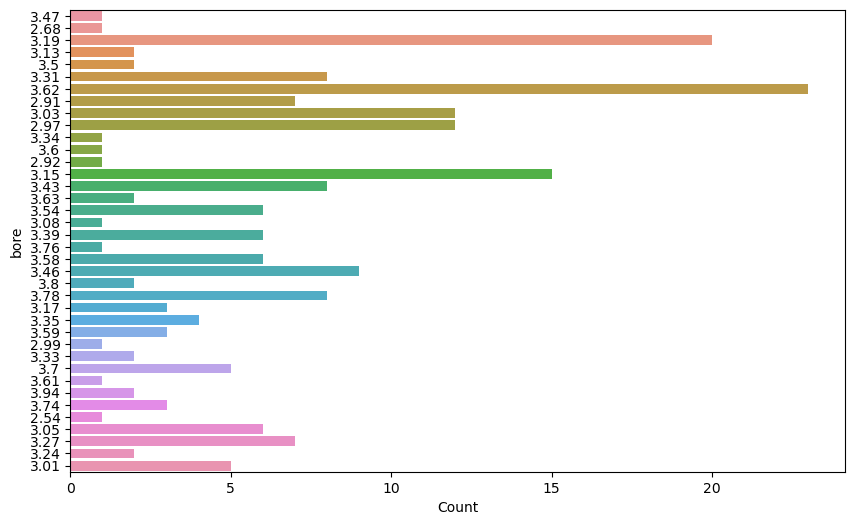

In [38]:
#Looking at bore
plot_categorical_column(df,'bore')

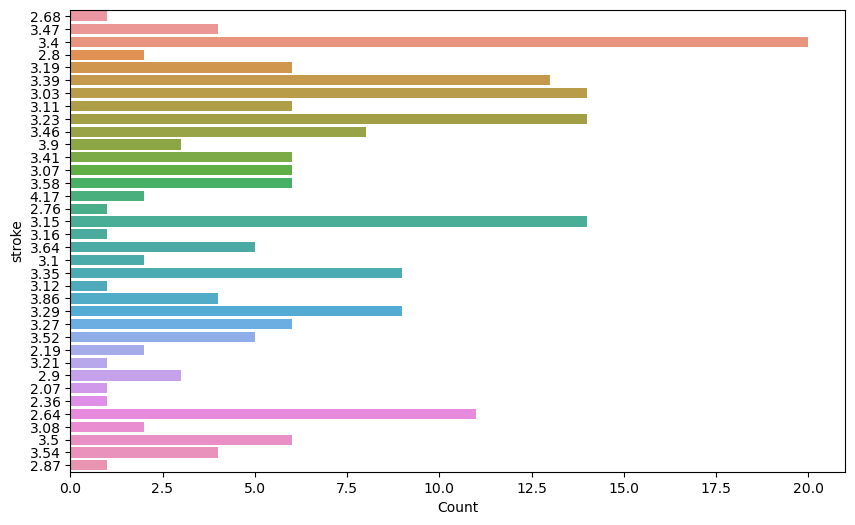

In [39]:
#Looking at stroke
plot_categorical_column(df,'stroke')

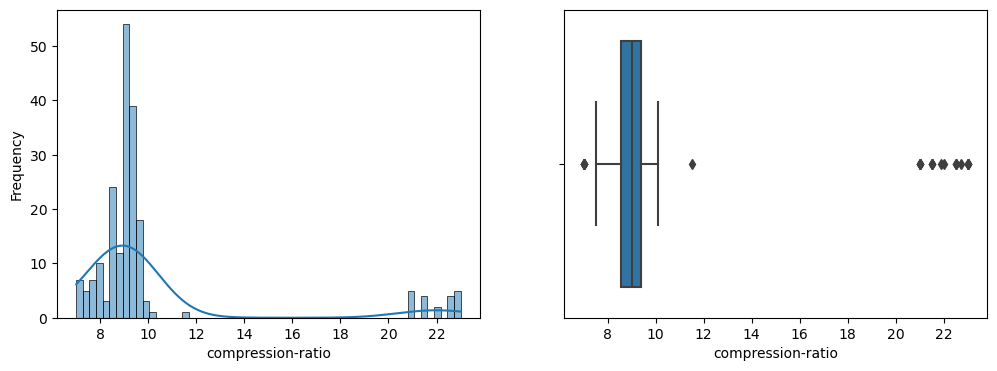

In [40]:
#Looking at compression-ratio
plot_numeric_column(df,'compression-ratio')

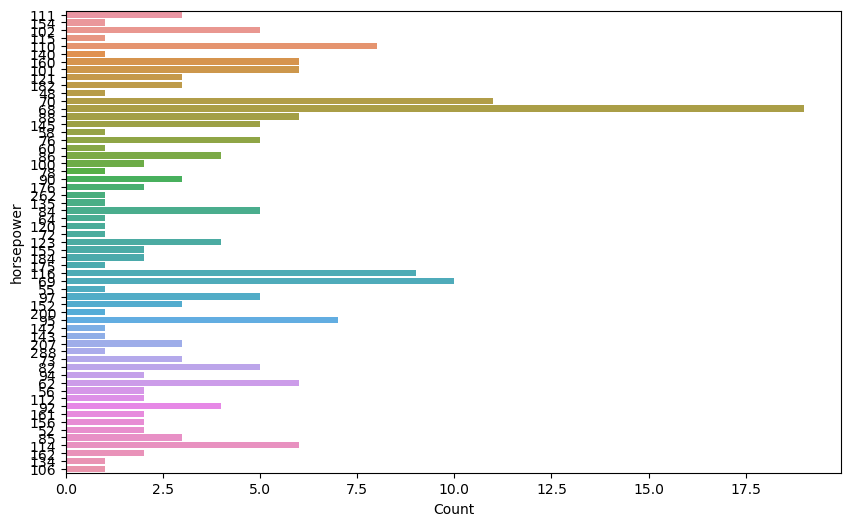

In [41]:
#Looking at horsepower
plot_categorical_column(df,'horsepower')

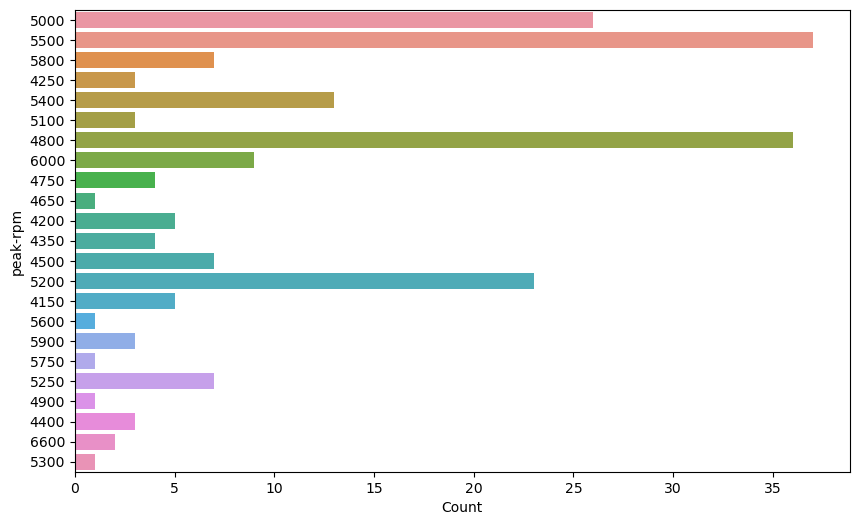

In [42]:
#Looking at peak-rpm
plot_categorical_column(df,'peak-rpm')

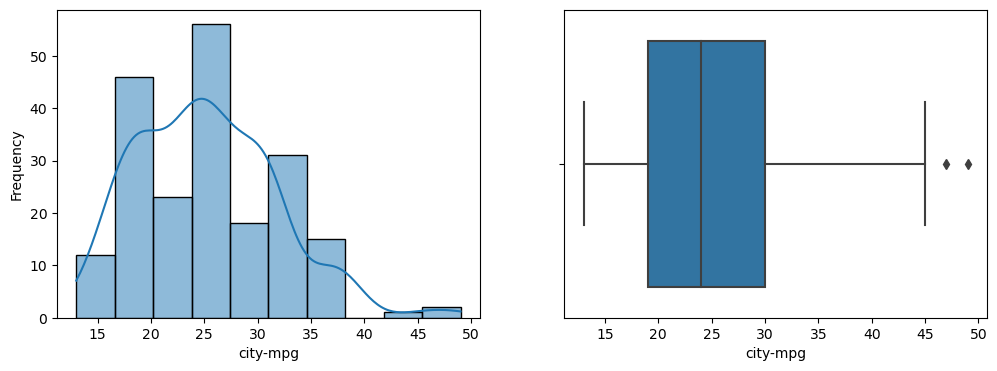

In [43]:
#Looking at city-mpg
plot_numeric_column(df,'city-mpg')

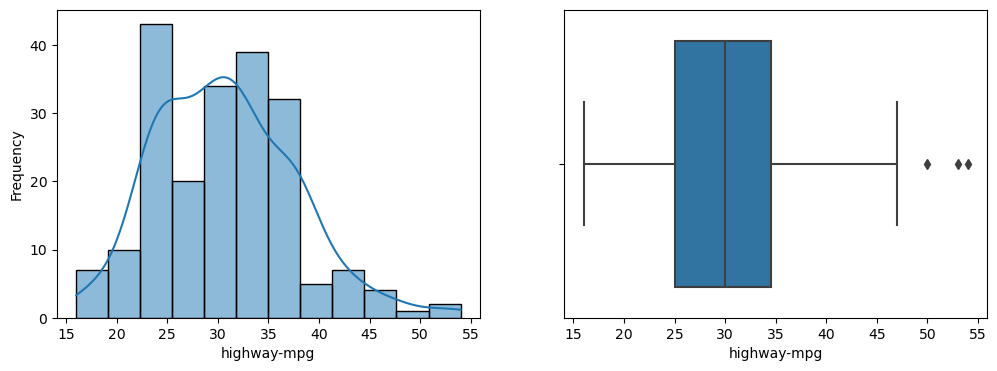

In [44]:
#Looking at highway-mpg
plot_numeric_column(df,'highway-mpg')

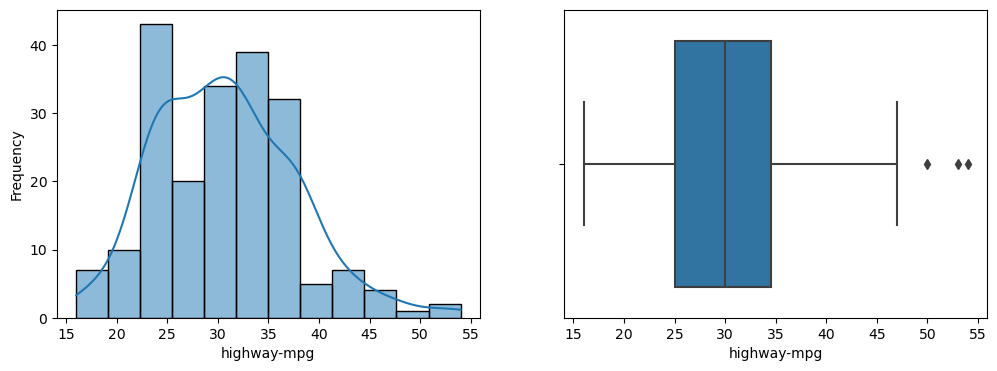

In [45]:
#Looking at price
plot_numeric_column(df,'highway-mpg')

Visualize the relationship between numerical variables:

In [46]:
#Usning pair plot for looking at the rlation ship between numerical varibales 

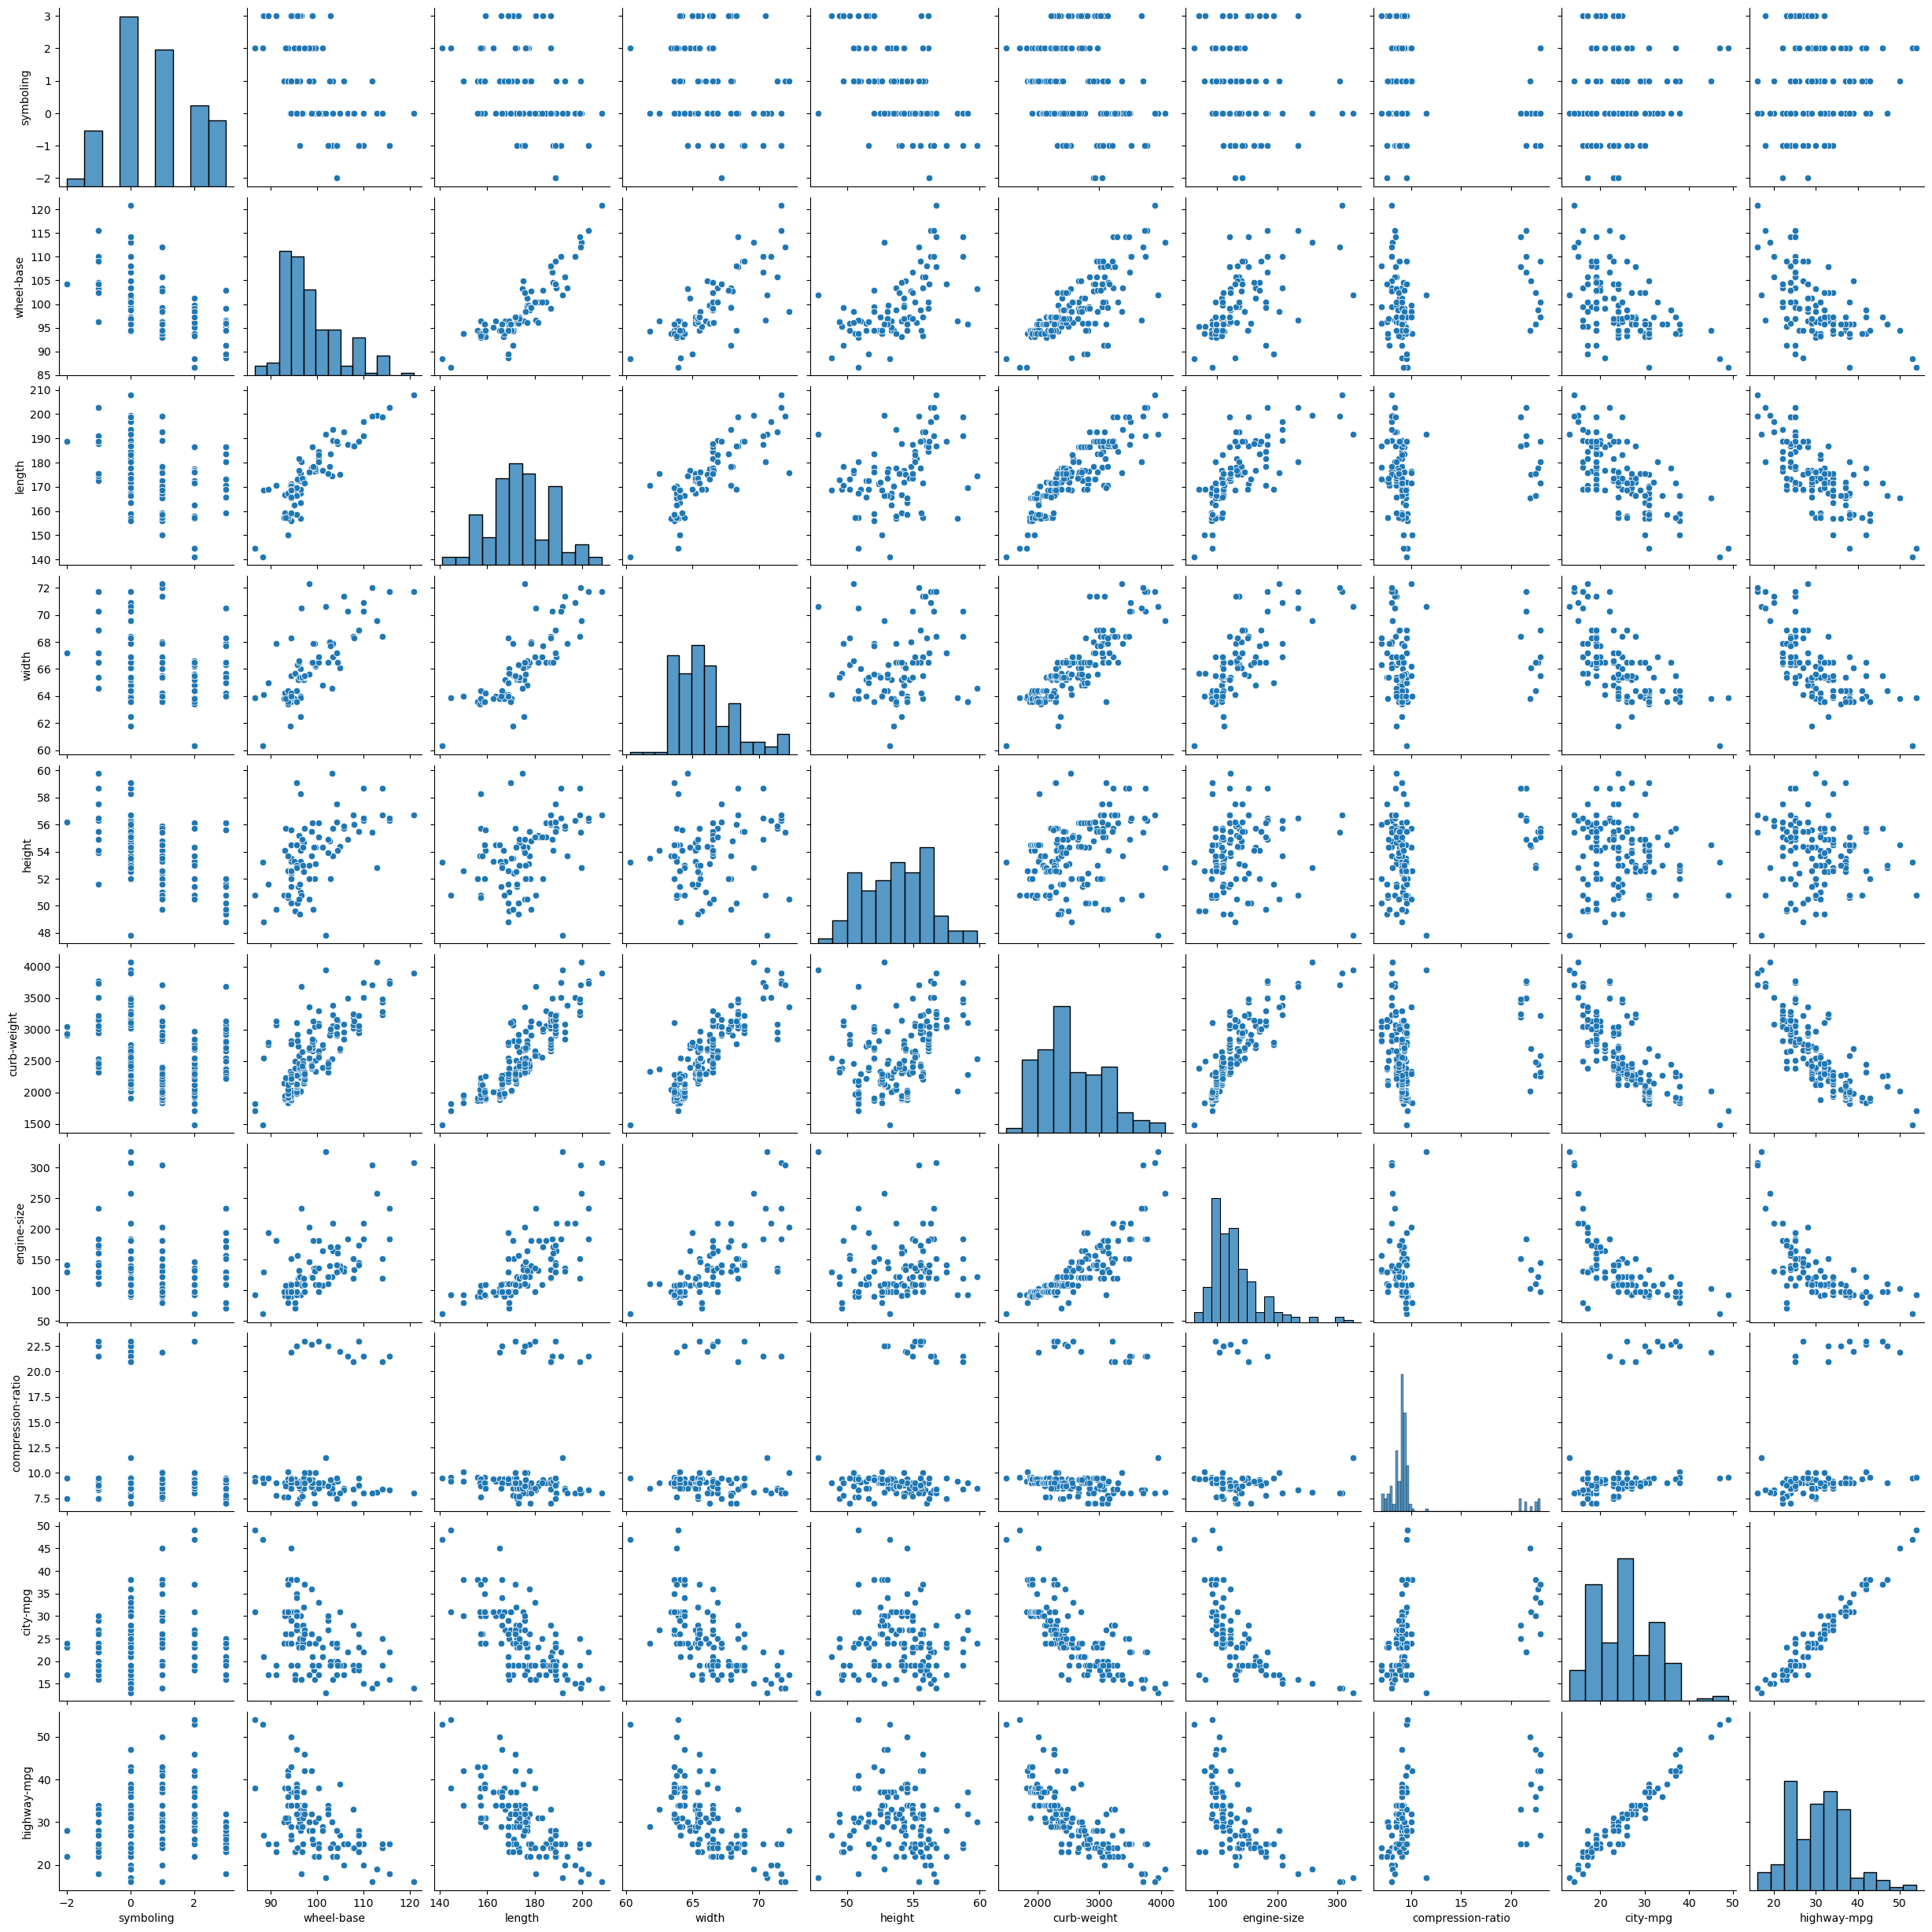

In [47]:
sns.pairplot(df.select_dtypes(exclude='object'))
plt.show()


Check for correlation between numerical variables:

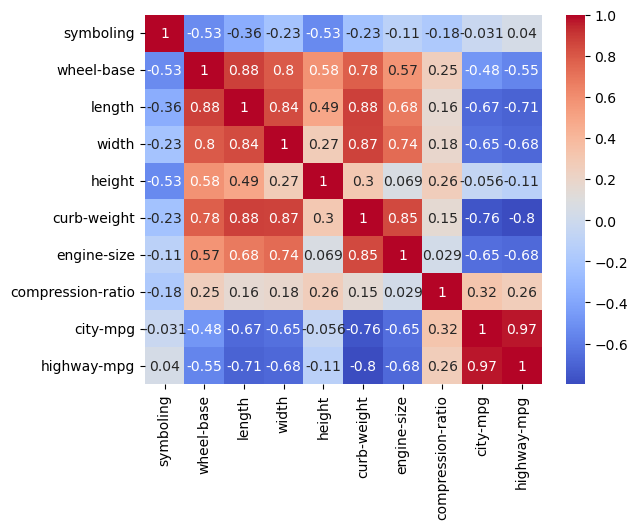

In [48]:
df.select_dtypes(exclude='object').corr()
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.show()


From the above EDA steps, we can make the following insights:

1)The dataset has 205 rows and 26 columns.

2)There are no missing values in the dataset.

3)The column 'symboling' seems to represent the risk rating of the car, with -2 indicating the least risky and +3 indicating the most risky.
4)The columns 'num-of-doors' and 'num-of-cylinders' have a few missing values represented by '?'. We may need to impute these missing values or drop these rows if they are not significant.

5)The numerical variables 'price', 'horsepower', and 'engine-size' have a right-skewed distribution, indicating that most cars have lower prices, horsepower, and engine sizes.

6)The pairplot shows that there may be linear relationships between some numerical variables, such as 'wheel-base' and 'length', 'curb-weight' and 'engine-size', 'city-mpg' and 'highway-mpg'.

7)The heatmap shows that there is a strong positive correlation between 'engine-size' and 'horsepower', and a strong negative correlation between 'city-mpg' and 'highway-mpg', which makes sense as larger engines tend to produce more power and consume more fuel.

Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.



Based on the EDA, the following numeric variables appear to require the use of feature scaling for preparing them for use in a machine learning algorithm:

1)normalized-losses: This variable has a wide range of values, with a minimum value of 65 and a maximum value of 256. Additionally, the standard deviation of this variable is quite high, indicating that the data is spread out over a large range. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

2)wheel-base: This variable also has a wide range of values, with a minimum value of 86.6 and a maximum value of 120.9. The standard deviation is also high, indicating that the data is spread out over a large range. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

3)length: This variable has a minimum value of 141.1 and a maximum value of 208.1, with a high standard deviation. Similar to the above variables, feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

4)width: This variable has a minimum value of 60.3 and a maximum value of 72.3, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

5)height: This variable has a minimum value of 47.8 and a maximum value of 59.8, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

6)curb-weight: This variable has a minimum value of 1488 and a maximum value of 4066, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

7)engine-size: This variable has a minimum value of 61 and a maximum value of 326, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

8)bore: This variable has a minimum value of 2.54 and a maximum value of 3.94, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

9)stroke: This variable has a minimum value of 2.07 and a maximum value of 4.17, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

10)horsepower: This variable has a minimum value of 48 and a maximum value of 288, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more suitable for use in a machine learning algorithm.

11)peak-rpm: This variable has a minimum value of 4150 and a maximum value of 6600, with a high standard deviation. Feature scaling methods like standardization or normalization can be used to bring the values within a similar range and to make them more

Consider the number-of-doors and price variables: Based on your EDA work, how many
missing data values occur within each of these attributes? As we’ve learned, missing data values can
impede the proper functioning of many machine learning algorithms. To address the missing the
number-of-doors and price values, you have been instructed to formulate what you believe will be an
2
effective data imputation approach for purposes of estimating reasonable proxies for the missing data
values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.

Based on the EDA performed earlier, the number-of-doors variable has 2 missing values and the price variable has 4 missing values. To impute these missing values, I would use a regression model to estimate the missing values based on the relationship with other variables in the dataset.

For the number-of-doors variable, I would use the make and body-style variables to predict the number of doors. Specifically, I would train a regression model using the non-missing values of make, body-style, and number-of-doors as the training set and use this model to predict the missing values of number-of-doors.

For the price variable, I would use the variables make, body-style, engine-size, horsepower, and highway-mpg to predict the missing values. Similarly, I would train a regression model using the non-missing values of these variables as the training set and use this model to predict the missing values of price.

In [49]:
# We will look aat the missing values in each column and analyse it 

In [50]:
# Looking at % of missing values 
df.isnull().sum()/df.shape[0]*100

symboling             0.000000
normalized-losses    19.607843
make                  0.000000
fuel-type             0.000000
aspiration            0.000000
num-of-doors          0.980392
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
wheel-base            0.000000
length                0.000000
width                 0.000000
height                0.000000
curb-weight           0.000000
engine-type           0.000000
num-of-cylinders      0.000000
engine-size           0.000000
fuel-system           0.000000
bore                  1.960784
stroke                1.960784
compression-ratio     0.000000
horsepower            0.980392
peak-rpm              0.980392
city-mpg              0.000000
highway-mpg           0.000000
price                 1.960784
dtype: float64

### 2

(15 Points) Consider the number-of-doors and price variables: Based on your EDA work, how many 
missing data values occur within each of these attributes? As we’ve learned, missing data values can 
impede the proper functioning of many machine learning algorithms. To address the missing the 
number-of-doors and price values, you have been instructed to formulate what you believe will be an 
effective data imputation approach for purposes of estimating reasonable proxies for the missing data 
values. Your supervisor tells you that the affected data observations MUST be retained within the data 
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the 
missing values since doing so would increase the likelihood of introducing unwarranted bias within the 
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics 
and commentary that explain your approach as well as the results of your efforts.

In [51]:
from sklearn.preprocessing import MinMaxScaler

# select columns to scale
scale_col = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']

# create scaler object
scaler = MinMaxScaler()

# fit and transform the data
df[scale_col] = scaler.fit_transform(df[scale_col])


In [52]:
from sklearn.preprocessing import StandardScaler

# select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# apply feature scaling to numeric columns and fit transforming the standar scaler on numeric columns
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_cols, columns=numeric_cols)


In [53]:
# Compare statistical summary 
print("Original Data Summary:\n") 

df[numeric_cols].describe()

Original Data Summary:



,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,202.000000,202.000000,204.000000,204.000000
mean,0.823529,0.355871,0.492164,0.468056,0.495752,0.414121,0.248650,0.196759,0.234262,0.398363,0.340005,30.769608
std,1.239035,0.174756,0.184509,0.178893,0.202075,0.202467,0.157527,0.248813,0.165876,0.196099,0.181986,6.898337
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,0.000000,0.230321,0.376119,0.314583,0.350000,0.254849,0.135849,0.098437,0.091667,0.265306,0.166667,25.000000
50%,1.000000,0.303207,0.479104,0.433333,0.525000,0.359193,0.220755,0.125000,0.195833,0.428571,0.305556,30.000000
75%,2.000000,0.460641,0.628358,0.550000,0.641667,0.562936,0.305660,0.150000,0.283333,0.551020,0.472222,34.500000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.000000


In [54]:
print("\nScaled Data Summary:\n") 
scaled_df.describe()


Scaled Data Summary:



,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.040000e+02,2.020000e+02,2.020000e+02,2.040000e+02,2.040000e+02
mean,1.110223e-16,-2.394599e-17,-6.966105e-17,-3.918434e-17,-4.560622e-16,-3.112978e-16,-1.238116e-16,9.551183e-17,2.124263e-16,-1.143200e-16,1.545605e-16,-1.360567e-17
std,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002460e+00,1.002484e+00,1.002484e+00,1.002460e+00,1.002460e+00
min,-2.284420e+00,-2.041392e+00,-2.673984e+00,-2.622836e+00,-2.459339e+00,-2.050402e+00,-1.582344e+00,-7.927359e-01,-1.415780e+00,-2.036482e+00,-1.872897e+00,-2.146306e+00
25%,-6.662891e-01,-7.201973e-01,-6.304845e-01,-8.600099e-01,-7.230489e-01,-7.885899e-01,-7.178345e-01,-3.961334e-01,-8.617845e-01,-6.802046e-01,-9.548249e-01,-8.384342e-01
50%,1.427762e-01,-3.020976e-01,-7.095485e-02,-1.945724e-01,1.450961e-01,-2.719577e-01,-1.775163e-01,-2.891137e-01,-2.322443e-01,1.544276e-01,-1.897649e-01,-1.118387e-01
75%,9.518415e-01,6.009979e-01,7.399577e-01,4.591908e-01,7.238595e-01,7.368194e-01,3.628019e-01,-1.883893e-01,2.965696e-01,7.804018e-01,7.283071e-01,5.420972e-01
max,1.760907e+00,3.694936e+00,2.759130e+00,2.980849e+00,2.501490e+00,2.900817e+00,4.781404e+00,3.236242e+00,4.627806e+00,3.075641e+00,3.635535e+00,3.375819e+00


In [55]:
# Looking at the null values before imputing
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a new DataFrame
new_df = df[['engine-location', 'fuel-type', 'engine-size', 'price', 'aspiration', 'num-of-doors']].copy()

In [ ]:
# Encode categorical variables as numerical for analysis
le = LabelEncoder()
new_df['engine-location'] = le.fit_transform(new_df['engine-location'])
new_df['fuel-type'] = le.fit_transform(new_df['fuel-type'])
new_df['aspiration'] = le.fit_transform(new_df['aspiration'])

In [ ]:
# Convert 'num-of-doors' to binary variable in the new dataframe as it has mostly 2 values
new_df['num-of-doors'] = new_df['num-of-doors'].map({'two': 0, 'four': 1})

# Drop rows with missing values as the missign value percentage is low
new_df.dropna(inplace=True)

In [57]:
# Create a feature matrix X and y
X_doors = new_df.drop(['num-of-doors'], axis=1)
y_doors = new_df['num-of-doors']

# Scale numeric variables
scaler = StandardScaler()
X_doors = scaler.fit_transform(X_doors)

In [58]:
from sklearn.tree import DecisionTreeClassifier
# Train a decision tree on X_doors and y_doors to get the predicted value for imputation
dt_doors = DecisionTreeClassifier(random_state=0)
dt_doors.fit(X_doors, y_doors)

DecisionTreeClassifier(random_state=0)

In [59]:
# Select all rows where 'num-of-doors' column is null and drop that column from the data frame
na_doors = df[df['num-of-doors'].isnull()].drop(['num-of-doors'], axis=1)[['engine-location', 'fuel-type', 'engine-size', 'price', 'aspiration']]

# Select only the columns 'engine-location', 'fuel-type', 'engine-size', 'price', 'aspiration' for the new data frame
na_doors['engine-location'] = na_doors['engine-location'].map({'front': 1, 'rear': 0})

# Map the values 'front' to 1 and 'rear' to 0 for the column 'engine-location'
na_doors['fuel-type'] = na_doors['fuel-type'].map({'gas': 1, 'diesel': 0})

# Map the values 'gas' to 1 and 'diesel' to 0 for the column 'fuel-type'
na_doors['aspiration'] = na_doors['aspiration'].map({'std': 1, 'turbo': 0})

# Map the values 'std' to 1 and 'turbo' to 0 for the column 'aspiration'
na_doors_scaled = scaler.transform(na_doors)


Scale the values of the new data frame using the pre-fitted StandardScaler object named 'scaler' and store in a new variable

In [60]:
#We get the scaled values
na_doors_scaled

array([[ 8.06225775,  0.3257994 , -0.69611413, -0.58700775, -0.46338313],
       [ 8.06225775, -3.06937333, -0.12062103, -0.30662307,  2.15804144]])

In [61]:
#Predicteing the values
x = list(dt_doors.predict(na_doors_scaled))

In [62]:
missing_doors_list = list(df[df['num-of-doors'].isnull()].index)

In [63]:
missing_doors_list

[26, 62]

In [64]:
#Imputing the value
for n, index in enumerate(missing_doors_list):
    df.at[index, 'num-of-doors'] = x[n]

In [65]:
# Checking the null values after imputing
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [66]:
# Looking at the Price column 
df['price'].isnull().sum()

4

In [67]:
#Looking at the dtypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg            int64
price                 object
dtype: object

In [68]:
# We will buld a Linear regression model with the below variables
# height, width, lenth, wheel_base, fuel-type, num-of-doors, engine-size, horsepower, compression-ratio ,
price_df = df[['height','width','length','wheel-base', 'fuel-type', 'num-of-doors', 'engine-size', 'horsepower', 'compression-ratio', 'price']]


In [69]:
price_df

,height,width,length,wheel-base,fuel-type,num-of-doors,engine-size,horsepower,compression-ratio,price
0,0.083333,0.316667,0.413433,0.058309,gas,two,0.260377,0.262500,0.12500,16500
1,0.383333,0.433333,0.449254,0.230321,gas,two,0.343396,0.441667,0.12500,16500
2,0.541667,0.491667,0.529851,0.384840,gas,four,0.181132,0.225000,0.18750,13950
3,0.541667,0.508333,0.529851,0.373178,gas,four,0.283019,0.279167,0.06250,17450
4,0.441667,0.500000,0.540299,0.384840,gas,two,0.283019,0.258333,0.09375,15250
...,...,...,...,...,...,...,...,...,...,...
199,0.641667,0.716667,0.711940,0.655977,gas,four,0.301887,0.275000,0.15625,16845
200,0.641667,0.708333,0.711940,0.655977,gas,four,0.301887,0.466667,0.10625,19045
201,0.641667,0.716667,0.711940,0.655977,gas,four,0.422642,0.358333,0.11250,21485
202,0.641667,0.716667,0.711940,0.655977,diesel,four,0.316981,0.241667,1.00000,22470


In [70]:
import warnings
warnings.filterwarnings('ignore')

# Mapping the categorical columns to numeric values
price_df.loc[:, 'fuel-type'] = price_df.loc[:, 'fuel-type'].map({'gas': 1, 'diesel': 0})
price_df.loc[:, 'num-of-doors'] = price_df.loc[:, 'num-of-doors'].map({'two': 1, 'four': 0})


In [71]:
# Dropping the null values
price_df = price_df.dropna()

In [72]:
#Looking at the dataframe
price_df

,height,width,length,wheel-base,fuel-type,num-of-doors,engine-size,horsepower,compression-ratio,price
0,0.083333,0.316667,0.413433,0.058309,1,1.0,0.260377,0.262500,0.12500,16500
1,0.383333,0.433333,0.449254,0.230321,1,1.0,0.343396,0.441667,0.12500,16500
2,0.541667,0.491667,0.529851,0.384840,1,0.0,0.181132,0.225000,0.18750,13950
3,0.541667,0.508333,0.529851,0.373178,1,0.0,0.283019,0.279167,0.06250,17450
4,0.441667,0.500000,0.540299,0.384840,1,1.0,0.283019,0.258333,0.09375,15250
...,...,...,...,...,...,...,...,...,...,...
199,0.641667,0.716667,0.711940,0.655977,1,0.0,0.301887,0.275000,0.15625,16845
200,0.641667,0.708333,0.711940,0.655977,1,0.0,0.301887,0.466667,0.10625,19045
201,0.641667,0.716667,0.711940,0.655977,1,0.0,0.422642,0.358333,0.11250,21485
202,0.641667,0.716667,0.711940,0.655977,0,0.0,0.316981,0.241667,1.00000,22470


In [73]:
# Splitting the data into X and y
X = price_df.iloc[:, :-1] 
y = price_df.iloc[:, -1] 

# Scaling using StandardScaler
lr_scaler = StandardScaler()
X = lr_scaler.fit_transform(X)

# building the linear regression model and fitting X and y 
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

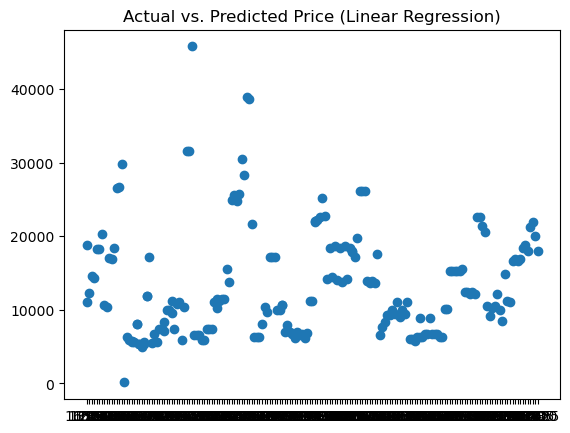

In [74]:
# Plotting the actual values and the predicted values
y_pred = lr_model.predict(X)
plt.scatter(y, y_pred)
plt.title('Actual vs. Predicted Price (Linear Regression)')
plt.show()


First, it scales selected columns in the DataFrame using MinMaxScaler and StandardScaler, which maps the values to a given range or centers the data to have mean zero and standard deviation of one.

Next, it encodes categorical variables as numerical using LabelEncoder and converts the 'num-of-doors' column to a binary variable. It drops rows with missing values and trains a decision tree classifier to predict the missing values of the 'num-of-doors' column.

Finally, it selects only the required columns from the DataFrame, maps categorical variables to numerical, scales the data, and uses the trained decision tree classifier to predict the missing values of the 'num-of-doors' column.

### 3 

Consider the engine-size and stroke variables: Describe the specific feature scaling method
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables. Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts.
Compare your newly created plots against the plots you created for the original content of the
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If
your feature scaling efforts did not improve the distribution of the data, explain why you believe your
efforts were not effective.

For the engine-size and stroke variables, I would apply the Min-Max scaling method, also known as normalization, to bring them to a common scale. This method scales the values of the variable between 0 and 1, where 0 represents the minimum value in the distribution, and 1 represents the maximum value.

To generate histograms and box plots for the original content of these two variables, I can use the following code:

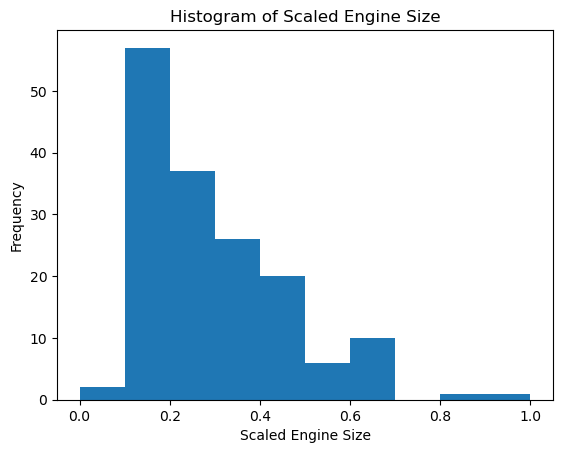

In [105]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply Min-Max scaling to engine-size variable
minmax_scaler = MinMaxScaler()
df['engine-size-scaled'] = minmax_scaler.fit_transform(df[['engine-size']])
# Apply Standardization to stroke variable
std_scaler = StandardScaler()
df['stroke-scaled'] = std_scaler.fit_transform(df[['stroke']])

# Histogram for scaled engine-size variable
plt.hist(df['engine-size-scaled'])
plt.title('Histogram of Scaled Engine Size')
plt.xlabel('Scaled Engine Size')
plt.ylabel('Frequency')
plt.show()

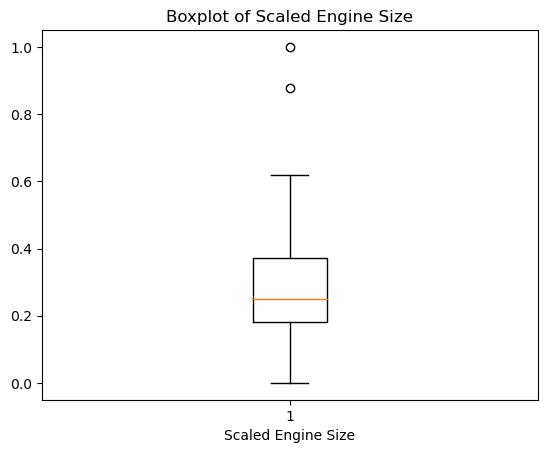

In [106]:
# Boxplot for scaled engine-size variable
plt.boxplot(df['engine-size-scaled'])
plt.title('Boxplot of Scaled Engine Size')
plt.xlabel('Scaled Engine Size')
plt.show()

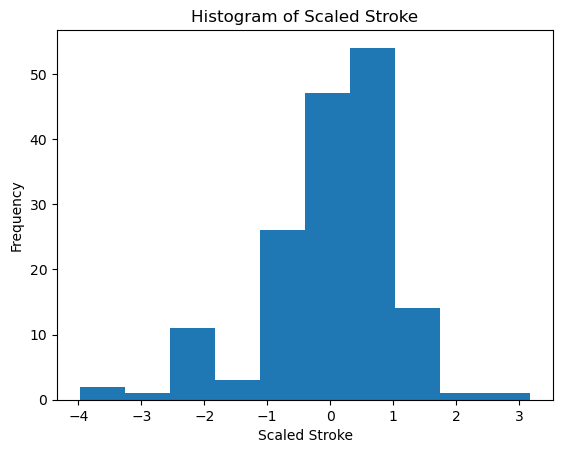

In [107]:
# Histogram for scaled stroke variable
plt.hist(df['stroke-scaled'])
plt.title('Histogram of Scaled Stroke')
plt.xlabel('Scaled Stroke')
plt.ylabel('Frequency')
plt.show()


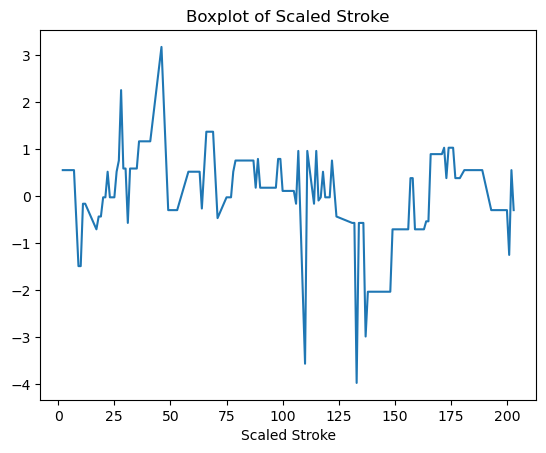

In [108]:
# plot for scaled stroke variable
plt.plot(df['stroke-scaled'])
plt.title('Boxplot of Scaled Stroke')
plt.xlabel('Scaled Stroke')
plt.show()


After applying Min-Max scaling to the variables, I can generate new histograms and box plots to visualize the effects of feature scaling. The code for generating these plots would be similar to the code used for the original content of the variables, with the scaled variable passed instead of the original variable.

In [76]:
df['stroke'].value_counts()

3.4     20
3.15    14
3.03    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.19     6
3.11     6
3.41     6
3.07     6
3.58     6
3.27     6
3.5      6
3.64     5
3.52     5
3.54     4
3.47     4
3.86     4
2.9      3
3.9      3
3.08     2
3.1      2
2.19     2
2.8      2
4.17     2
2.36     1
2.68     1
2.07     1
3.21     1
3.12     1
3.16     1
2.76     1
2.87     1
Name: stroke, dtype: int64

The Min-Max scaler is applied to the engine-size variable, while Standardization is applied to the stroke variable.

The scaled values are stored in new columns, engine-size-scaled and stroke-scaled.

The code then creates visualizations of the scaled variables using histograms and boxplots to examine their distributions and identify any outliers. The plt library is used to create these visualizations.

The hist function is used to create histograms, which show the frequency distribution of the values. The boxplot function is used to create boxplots, which show the median, quartiles, and any outliers in the data.

Finally, the plot function is used to create a line plot of the stroke-scaled variable

### 4

 Consider the symboling,make, and engine-type variables:

A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, 
categorical/nominal, or categorical/ordinal

B) For each variable, describe the methodology you would employ for purposes of preparing its data 
values for use within a machine learning algorithm.

C) Using your Python skills, apply your prescribed data preparation methodologies to the three 
variables. Be sure to show a sample of your results within you Jupyter Notebook

A)

symboling: numeric/discrete
make: categorical/nominal
engine-type: categorical/nominal

B)

symboling: Since symboling is already a numeric/discrete variable, it does not require any further preparation for use within a machine learning algorithm.
make: One approach to preparing make for use within a machine learning algorithm would be to use one-hot encoding to convert the categorical variable into a set of binary indicator variables. This would allow us to represent each make as a vector of binary values, where each element of the vector corresponds to a different make and is either 0 or 1 depending on whether the corresponding make is present or absent.
engine-type: Similar to make, we can use one-hot encoding to convert engine-type into a set of binary indicator variables. This would allow us to represent each engine-type as a vector of binary values, where each element of the vector corresponds to a different engine-type and is either 0 or 1 depending on whether the corresponding engine-type is present or absent.

C)

To prepare make and engine-type for use within a machine learning algorithm, we can use the get_dummies() function in pandas, which automatically performs one-hot encoding. Here is an example of how to apply this approach to make and engine-type:

In [77]:
# Convert make and engine-type into binary indicator variables using one-hot encoding
make_dummies = pd.get_dummies(df['make'], prefix='make')
engine_type_dummies = pd.get_dummies(df['engine-type'], prefix='engine_type')

# Concatenate the binary indicator variables with the original dataframe
df = pd.concat([df, make_dummies, engine_type_dummies], axis=1)

# Drop the original make and engine-type columns
df = df.drop(['make', 'engine-type'], axis=1)

# Show a sample of the resulting dataframe
df.head()


,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_toyota,make_volkswagen,make_volvo,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor
0,3,NaN,gas,std,two,convertible,rwd,front,0.058309,0.413433,...,0,0,0,1,0,0,0,0,0,0
1,1,NaN,gas,std,two,hatchback,rwd,front,0.230321,0.449254,...,0,0,0,0,0,0,0,0,1,0
2,2,164,gas,std,four,sedan,fwd,front,0.384840,0.529851,...,0,0,0,0,0,0,1,0,0,0
3,2,164,gas,std,four,sedan,4wd,front,0.373178,0.529851,...,0,0,0,0,0,0,1,0,0,0
4,2,NaN,gas,std,two,sedan,fwd,front,0.384840,0.540299,...,0,0,0,0,0,0,1,0,0,0


In [78]:
# select the variables to be used for PCA
X = df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']]


To reduce the dimensionality of the given set of variables, we can use Principal Component Analysis (PCA) which is a popular method for dimensionality reduction. PCA can transform a set of correlated variables into a set of uncorrelated orthogonal components, where each component represents a linear combination of the original variables.

Here's how we can implement PCA in Python:

In [81]:
#Looking at the null values remaining in the dataframe
df.isnull().sum()

symboling              0
normalized-losses     40
fuel-type              0
aspiration             0
num-of-doors           0
body-style             0
drive-wheels           0
engine-location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
num-of-cylinders       0
engine-size            0
fuel-system            0
bore                   4
stroke                 4
compression-ratio      0
horsepower             2
peak-rpm               2
city-mpg               0
highway-mpg            0
price                  4
engine-size-scaled     0
stroke-scaled          4
make_alfa-romero       0
make_audi              0
make_bmw               0
make_chevrolet         0
make_dodge             0
make_honda             0
make_isuzu             0
make_jaguar            0
make_mazda             0
make_mercedes-benz     0
make_mercury           0
make_mitsubishi        0
make_nissan            0
make_peugot            0


In [84]:
#Since to do PCA we will need to to handle the missing values 
#We can drop the remaining null values to perform our PCA
df=df.dropna()

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the relevant variables
# select the variables to be used for PCA
X = df[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']]

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

# Perform PCA and extract the first 2 principal components
pca = PCA(n_components=10)
pca_components = pca.fit_transform(scaled_df)



In [101]:
# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8' ,'PC9','PC10'])

# Calculate the variance explained by the principal components
variance_ratio = pca.explained_variance_ratio_

print("Variance explained by each principal component: ", variance_ratio)

Variance explained by each principal component:  [0.57510528 0.18793301 0.09473919 0.06187689 0.02748803 0.01545382
 0.01294155 0.01063123 0.00886928 0.00496172]


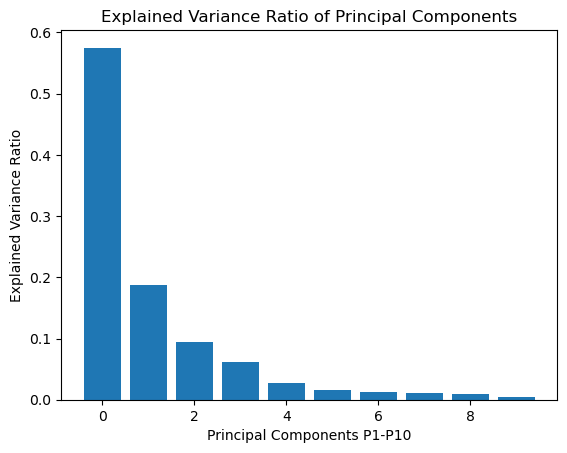

In [103]:
# plot the explained variance ratio
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Components P1-P10')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

we perform principal component analysis (PCA) on a set of variables in a dataframe. It first converts categorical variables into binary indicator variables using one-hot encoding, and then selects a subset of numerical variables to be used for PCA. It then standardizes the numerical variables using StandardScaler and performs PCA using the sklearn.decomposition.PCA function. The code extracts the first two principal components and creates a new dataframe with these components. Finally, the code calculates the variance explained by each principal component and plots a bar chart showing the proportion of total variance explained by each principal component. The resulting plot helps to identify which principal components are most important in explaining the variability in the data.